# WeatherPy Python API homework
----

### Background
Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

Your final notebook must:
Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:
You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.


In [2]:
# Dependencies and Setup
#!pip install citipy  -- This step has been completed before,  so not needed to repeat
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to find cities based on latitude and longitude

from citipy import citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (greater than 500, in case some data is not found)
len(cities)


640

In [4]:
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Initialize the variables and configuration to be used

import json
from config_2 import weather_api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lng = []
temp = []
temp_max = []
humidity =[]
visibility = []
wind_speed = []
country =[]
city_name =[]
clouds = []
data_date = []

counter=0


In [6]:
# Test run to look at the data first
# Pretty Print out the data stored in the Weather API to figure out which data to extract in a list
response = requests.get(query_url + city)
citylist = response.json()
print(json.dumps(citylist, indent=4, sort_keys=True))


{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 30.04,
        "lon": -94.42
    },
    "dt": 1549319700,
    "id": 4732862,
    "main": {
        "humidity": 76,
        "pressure": 1013,
        "temp": 23.09,
        "temp_max": 23.8,
        "temp_min": 21.7
    },
    "name": "Nome",
    "sys": {
        "country": "US",
        "id": 3476,
        "message": 0.0038,
        "sunrise": 1549285535,
        "sunset": 1549324687,
        "type": 1
    },
    "visibility": 16093,
    "weather": [
        {
            "description": "haze",
            "icon": "50d",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 2.1
    }
}


In [7]:
# Loop through the list of cities and perform a request for data on each name on the random list
# Use exception handling to prevent stoppage


print("Beginning Data Retrieval")
print("----------------------------------------------------")


for city in cities:
    try:
        #print(query_url + city)
        response = requests.get(query_url + city).json()

        data_date.append(response['dt'])
        country.append(response['sys']['country'])  
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        visibility.append(response['weather'][0]['main'])

        print(f'Processing Record number: {counter+1} , {country[counter]}, {city_name[counter]}')
    #    print(country[counter], city_name[counter])
        counter += 1
    #        if counter == 20:
    #            break

    except (KeyError, IndexError, NameError, RuntimeError):
        print("Missing field/result... skipping.")
        
#except NameError:
#    print("Name Error - not defined")

#except KeyError:
#    print("Key Error - continue")
    
#except ValueError:
#   print("wrong value type")
    
#except IndexError:
#    print("Wrong index")
    
#except LookupError:
#    print("City not found")




Beginning Data Retrieval
----------------------------------------------------
Processing Record number: 1 , CA, Yellowknife
Processing Record number: 2 , PF, Atuona
Processing Record number: 3 , TC, Cockburn Town
Processing Record number: 4 , ZA, Bredasdorp
Processing Record number: 5 , AU, Margate
Processing Record number: 6 , PT, Saldanha
Processing Record number: 7 , PF, Rikitea
Processing Record number: 8 , UA, Orikhiv
Processing Record number: 9 , US, Valparaiso
Processing Record number: 10 , AU, Busselton
Processing Record number: 11 , BR, Jacobina
Processing Record number: 12 , GB, Brighton
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record number: 13 , US, Kapaa
Processing Record number: 14 , NA, Rundu
Processing Record number: 15 , CL, Punta Arenas
Processing Record number: 16 , AU, Palmer
Processing Record number: 17 , CA, Saint-Philippe
Processing Record number: 18 , AU, New Norfolk
Processing Record number: 19 , CA, Aklavik
Processing Reco

Processing Record number: 166 , AU, Kiama
Processing Record number: 167 , MN, Darhan
Processing Record number: 168 , KR, Seoul
Processing Record number: 169 , NG, Naze
Processing Record number: 170 , CN, Nanchang
Processing Record number: 171 , RU, Saskylakh
Processing Record number: 172 , RU, Megion
Processing Record number: 173 , RU, Kodinsk
Processing Record number: 174 , US, Bon Air
Processing Record number: 175 , GB, Sale
Processing Record number: 176 , RU, Dikson
Processing Record number: 177 , US, Kodiak
Processing Record number: 178 , NZ, Kaitangata
Missing field/result... skipping.
Processing Record number: 179 , AU, Broken Hill
Missing field/result... skipping.
Processing Record number: 180 , US, Raton
Processing Record number: 181 , NZ, Ngunguru
Processing Record number: 182 , AO, Namibe
Processing Record number: 183 , SO, Eyl
Processing Record number: 184 , ZA, Kruisfontein
Processing Record number: 185 , US, Pacific Grove
Processing Record number: 186 , GB, Blackwater
Miss

Processing Record number: 336 , LY, Sabha
Processing Record number: 337 , US, Makakilo City
Processing Record number: 338 , CA, Marystown
Processing Record number: 339 , US, Aiken
Processing Record number: 340 , PG, Vanimo
Missing field/result... skipping.
Processing Record number: 341 , SE, Kristinehamn
Processing Record number: 342 , IT, Rome
Processing Record number: 343 , RU, Batagay
Processing Record number: 344 , RU, Yerbogachen
Processing Record number: 345 , BR, Sao Gabriel da Cachoeira
Processing Record number: 346 , RU, Vilyuysk
Processing Record number: 347 , CI, Mankono
Processing Record number: 348 , TT, Esperance
Processing Record number: 349 , PG, Kavieng
Processing Record number: 350 , FR, Souillac
Processing Record number: 351 , AR, Necochea
Processing Record number: 352 , CA, Valleyview
Processing Record number: 353 , GF, Cayenne
Processing Record number: 354 , CU, Niquero
Processing Record number: 355 , IN, Fatehabad
Processing Record number: 356 , RU, Ust-Nera
Proce

Processing Record number: 501 , RU, Shushenskoye
Missing field/result... skipping.
Processing Record number: 502 , AU, Alyangula
Processing Record number: 503 , RU, Makarov
Processing Record number: 504 , CN, Yuncheng
Processing Record number: 505 , UY, Maldonado
Missing field/result... skipping.
Processing Record number: 506 , RU, Vysotsk
Processing Record number: 507 , US, Seminole
Processing Record number: 508 , US, Missoula
Processing Record number: 509 , ID, Belawan
Processing Record number: 510 , RU, Zhigansk
Processing Record number: 511 , RU, Sosnovo-Ozerskoye
Processing Record number: 512 , JP, Tateyama
Processing Record number: 513 , CA, Bonavista
Processing Record number: 514 , US, Ahuimanu
Processing Record number: 515 , UY, Rocha
Processing Record number: 516 , RU, Agirish
Processing Record number: 517 , KZ, Beyneu
Missing field/result... skipping.
Processing Record number: 518 , ZW, Bulawayo
Processing Record number: 519 , GE, Ambrolauri
Processing Record number: 520 , MV

In [8]:
# Convert from Celsius to Fahrenheit using pytemperature
# Reference Stack Overflow
# 

def c2f(x):
    x = x * 1.8 + 32
    return float(x)


In [9]:
# Opportunity to look at the data, Check the data was converted to Fahrenheit from Celsius
#print(f"The date is: {data_date}")    
#print(f"The country code is: {country}")
#print(f"The city name is: {city_name}")
#print(f"The longitude information received is: {lng}")
#print(f"The latitude information received is: {lat}")
print(f"The max temperature information received is: {temp_max}")
#print(f"The avg temperature information received is: {temp}")
#print(f"The humidity information received is: {humidity}")
#print(f"The wind speed received is: {wind_speed}")
#print(f"The cloudiness is: {clouds}")
#print(f"The visibility is: {visibility}")

    
        

The max temperature information received is: [-31, 27.76, 26.06, 15, 14, -2.64, 27.14, 1, 11.1, 20.56, 19.41, 7, 26.1, 18.11, 20, 19, -0.5, 14, -18, 24.59, 15.66, -0.69, 22.59, 12.09, 26, 14.96, 12.2, 24.06, -24, 25.59, 26, 4.64, 25.61, 15.46, 27, -18.29, 24.84, 17.06, 27.2, 1, 5, -10, 28.56, 27, 24.06, -33.74, 28, 14, 10, 30, 28.84, 24, 19, 25.84, 28, 22, 13.3, 27.8, -10.54, -44.29, 27, 23.91, 29, 28, -22.67, 24.64, 15, -2.2, -15.4, 26.39, 25.01, 18.01, -10.14, 26.84, -26, 22, 19.16, 17, 11.24, -23.99, -38.94, 28, 29, 9.31, 18.64, 13, -2.99, 1.7, 28, 26, 22.91, 4.16, 26.09, 26.1, -6, 24, -3.59, -25.17, -18.29, -4.9, 17.59, 23.89, 19.41, 26.7, 23.14, 20.96, -7.39, -16, 0.46, 25.99, 33, 3.9, 17.51, 4.71, -13, 29.66, 15, 15.41, -9.17, 25.39, 8.3, 25, 24.89, -22.74, -6.14, 21.39, 19, 15.51, 26.06, -5, 21.46, 11, -30.67, 24, -33.69, 3, 10, 21.09, 23, -28, -3, 4, 12, -29.42, 1.11, 20.66, 25, -24.12, 22, 28, 3.89, 33, 18, -28.67, 3, 3, 24.99, 24.86, -23.74, 25, 3.39, 20.16, -10, 25, 27, 23, 

### Convert Raw Data to DataFrame

* Display the DataFrame
* Export the city data into a .csv.

In [10]:
# Put the data into a Pandas DataFrame

cities_df=pd.DataFrame(
    {"City": city_name,
    "Country": country,
    "Long.":lng,
    "Lat." :lat,
    "Temp.":temp_max,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Visibility": visibility,
    "Cloudiness": clouds,
    "Date": data_date}
)

# Clean up the table format
# Change date from unix code to a more readable date

cities_df['Date'] = pd.to_datetime(cities_df['Date'],unit = 's')

# The date data normally includes hour/minute/secs... but this timestamp is for when the latest
# real-time weather data (latest data)
# 
# If needed clean up the date time - remove the hours/min/secs 
# cities_d['Date'] = cities_df['Date'].dt.date


# Convert the data from Celsius (default from WeatherMapAPI) to Fahrenheit

cities_df['Temp.'] = cities_df['Temp.'].apply(c2f)

cities_df


,City,Country,Long.,Lat.,Temp.,Humidity,Wind Speed,Visibility,Cloudiness,Date
0,Yellowknife,CA,-114.38,62.45,-23.800,74,3.60,Clear,5,2019-02-04 22:00:00
1,Atuona,PF,-139.03,-9.80,81.968,100,8.17,Clouds,32,2019-02-04 23:13:59
2,Cockburn Town,TC,-71.14,21.46,78.908,99,1.62,Clear,0,2019-02-04 23:11:48
3,Bredasdorp,ZA,20.04,-34.53,59.000,87,0.50,Clear,0,2019-02-04 22:00:00
4,Margate,AU,147.26,-43.03,57.200,82,4.10,Drizzle,75,2019-02-04 22:30:00
5,Saldanha,PT,-6.55,41.42,27.248,80,1.17,Clouds,20,2019-02-04 23:14:00
6,Rikitea,PF,-134.97,-23.12,80.852,100,2.22,Clear,8,2019-02-04 23:14:00
7,Orikhiv,UA,35.78,47.57,33.800,100,2.00,Fog,90,2019-02-04 22:30:00
8,Valparaiso,US,-87.06,41.47,51.980,93,6.20,Rain,90,2019-02-04 22:45:00
9,Busselton,AU,115.35,-33.64,69.008,98,7.82,Clear,0,2019-02-04 23:14:01


In [11]:
# Output File (CSV)

cities_df.to_csv('cities.csv')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

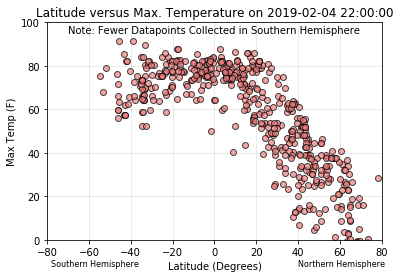

<Figure size 432x288 with 0 Axes>

In [58]:
# Scatterplt

latx = cities_df["Lat."]
tempy = cities_df["Temp."]

cdate = cities_df["Date"]
checked_date = cdate[0]

# temp_scale = tempy = cities_df["Temp."]  # Not used

plt.scatter(latx, tempy, marker = "o", facecolors = "lightcoral", edgecolors = "black",
                       alpha = 0.7)


# Incorporate the other graph properties
plt.ylim(0,100)
plt.xlim(-80, 80)
plt.grid(color="grey", alpha=0.2)

plt.title(f"Latitude versus Max. Temperature on {checked_date}")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Max Temp (F)")

# Add labels to give more context to the latitude

style = dict(size=8, color ='black')
plt.text(-78,-12, "Southern Hemisphere", **style)
plt.text(40,-12, "Northern Hemisphere", **style)
plt.text(-70,95, "Note: Fewer Datapoints Collected in Southern Hemisphere")


plt.show()

# Save Figure
plt.savefig("./Lat_versus_Max_Temp.png")

### Analysis
* The Max temperature versus Latitude shows the equator has the high temperature and there is a slight skew of warm temperatures towards the Southern Hemisphere (negative latitude).  This can be seen by look at the data between -20 to -40 degrees latitude, versus +20-+40 degrees latitude. In the Southern Hemisphere (-20 to -40), the temperatures range from 55-95F,  while in the Northern hemisphere (+20 to +40), the temperatures range from 20-80 F. This is attributable to the tilt of the earth's axis relative to the position of the sun, with the south pole being slightly closer to the sun,  than the north pole.

* There is missing data in the South Pole (latitudes from -160 to -180 degrees). This can be explained by looking at a map or globe and noting the continent of Anarctica is more or less centered on the South pole at those latitudes.  Anarctica is primarily covered by glacial ice, windswept and barren (Wikipedia), with few cities / states,  and thus makes sense very few weather data points. 

* There is no clear relationship between Humidity and latitude,  and Wind Speed and latitude

* There is no clear relationship between Visibility (Cloudiness) and latitude, although there are bands of Cloudiness observed at 0 (i.e. Clear Skies), 20, 40, 70, and 95 Cloudiness.  To analyze further, perhaps use the "Visibility" data which contains the description.   Cloudiness > 0 could mean cloudy, rain, mist, drizzle or snow.  Perhaps color coding each of those conditions might be interesting.

#### Latitude vs. Humidity Plot

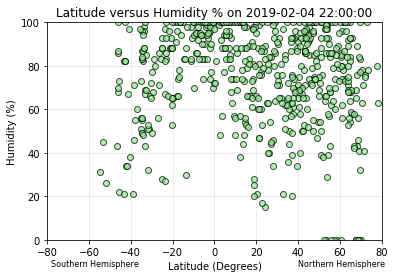

<Figure size 432x288 with 0 Axes>

In [57]:
humidityy = cities_df["Humidity"]
latx = cities_df["Lat."]

# humidity_scale = cities_df["Humidity"] # Not us

plt.scatter(latx, humidityy, marker = "o", facecolors = "lightgreen", edgecolors = "black",
                       alpha = 0.7)


# Incorporate the other graph properties
plt.ylim(0,100)
plt.xlim(-80, 80)
plt.grid(color="grey", alpha=0.2)

plt.title(f"Latitude versus Humidity % on {checked_date}")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Humidity (%)")
plt.text(-78,-12, "Southern Hemisphere", **style)
plt.text(40,-12, "Northern Hemisphere", **style)

plt.show()
# Save Figure
plt.savefig("./Lat_versus_Humidity.png")

#### Latitude vs. Cloudiness Plot

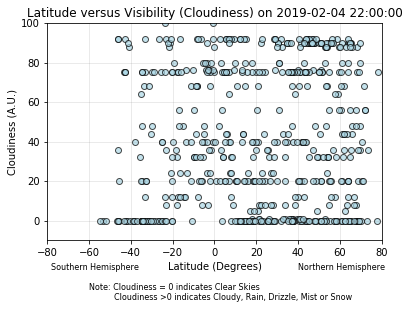

<Figure size 432x288 with 0 Axes>

In [56]:
cloudy = cities_df["Cloudiness"]
latx = cities_df["Lat."]

#cloud_scale = cities_df["Cloudiness"] # not used

plt.scatter(latx, cloudy, marker = "o", facecolors = "lightblue", edgecolors = "black",
                       alpha = 0.7)


# Incorporate the other graph properties
plt.ylim(-10,100)
plt.xlim(-80, 80)
plt.grid(color="grey", alpha=0.2)

plt.title(f"Latitude versus Visibility (Cloudiness) on {checked_date}")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Cloudiness (A.U.)")

# Incorporate a text label explaining what the Cloudiness scale means
# Reference:   https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html 
# Python Data Science Handbook by Jake VanderPlas

style = dict(size=8, color ='black')
plt.text(-60,-35, "Note: Cloudiness = 0 indicates Clear Skies ", **style)
plt.text(-60,-40, "          Cloudiness >0 indicates Cloudy, Rain, Drizzle, Mist or Snow", **style)
plt.text(-78,-25, "Southern Hemisphere", **style)
plt.text(40,-25, "Northern Hemisphere", **style)

plt.show()
# Save Figure
plt.savefig("./Lat_versus_Visibility.png")

#### Latitude vs. Wind Speed Plot

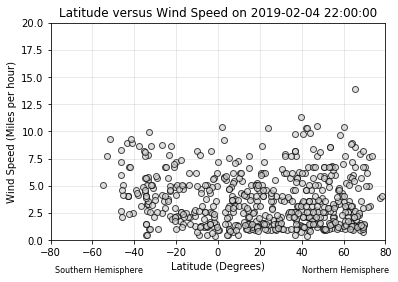

<Figure size 432x288 with 0 Axes>

In [53]:
windy = cities_df["Wind Speed"]
latx = cities_df["Lat."]

# wind_scale = cities_df["Wind Speed"] # Not used

plt.scatter(latx, windy, marker = "o", 
            facecolors = "lightgrey", 
            edgecolors = "black",
            alpha = 0.7)


# Incorporate the other graph properties
plt.ylim(0,20)
plt.xlim(-80, 80)
plt.grid(color="grey", alpha=0.2)

plt.title(f"Latitude versus Wind Speed on {checked_date}")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Wind Speed (Miles per hour)")

style = dict(size=8, color ='black')
plt.text(-78,-3, "Southern Hemisphere", **style)
plt.text(40,-3, "Northern Hemisphere", **style)

plt.show()
# Save Figure
plt.savefig("./Lat_versus_Wind_Speed.png")